# 6.1 Classification 

## 6.1.1 Create a classification model using a logistic regression!

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
* Train a model using a testing dataset of 25%!
* Visualize the model!
* Create a confusion matrix!
* Compute precision and recall for every class in your model!

In [1]:
%matplotlib inline
import os, sys
from sklearn import linear_model, datasets
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, precision_recall_curve, classification_report

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa


In [3]:
# Split train and testset
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

iris_df_train, iris_df_test, iris_df_target_train, iris_df_target_test =\
    train_test_split(X,Y, test_size=0.25, random_state=42)
print(str(len(iris_df))+" full = "+str(len(iris_df_train))+" train + "+str(len(iris_df_test))+" test")

150 full = 112 train + 38 test


SKLearn logreg.fit time:  0.010862588882446289


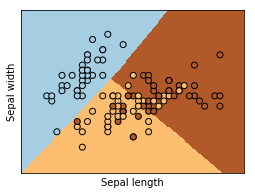

In [10]:
import time
h = .02 

logreg = linear_model.LogisticRegression(C=1e5)
skstart = time.time()
logreg.fit(iris_df_train, iris_df_target_train)
skend = time.time()
print("SKLearn logreg.fit time: ",skend - skstart)

x_min, x_max = iris_df_train[:, 0].min() - .5, iris_df_train[:, 0].max() + .5
y_min, y_max = iris_df_train[:, 1].min() - .5, iris_df_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(iris_df_train[:, 0], iris_df_train[:, 1], c=iris_df_target_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
# Confusion Matrix
y_pred = logreg.predict(iris_df_test)
confusion_matrix(iris_df_target_test, y_pred)

array([[15,  0,  0],
       [ 0,  7,  4],
       [ 0,  1, 11]])

In [12]:
class_names = iris.target_names
print(classification_report(iris_df_target_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.88      0.64      0.74        11
  virginica       0.73      0.92      0.81        12

avg / total       0.88      0.87      0.87        38



## 6.1.2 Spark

* Using Spark MLlib to create a Logistic Regression!
    * https://spark.apache.org/docs/latest/ml-classification-regression.html
    * <https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.LogisticRegression>
    
* Measure the training time. Compare the training time with the scikit-learn implementation! Explain! 

In [15]:
SPARK_MASTER="local[1]"
#SPARK_MASTER="spark://mpp3r03c04s06.cos.lrz.de:7077"
APP_NAME = "PySpark Lecture Herget"
# If there is no SparkSession, create the environment
# os.environ["PYSPARK_PYTHON"] = "/naslx/projects/ug201/di57hah/anaconda2/envs/python3/bin/python"

try:
    sc and spark
except NameError as e:
  #import findspark
  #findspark.init()
    import pyspark
    import pyspark.sql
    from pyspark.ml.feature import FeatureHasher, VectorAssembler
    from pyspark.ml.classification import LogisticRegression
    conf=pyspark.SparkConf().set("spark.cores.max", "4")
    sc = pyspark.SparkContext(master=SPARK_MASTER, conf=conf)
    spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()

print("PySpark initiated...")

PySpark initiated...


In [19]:
## Logisitic Regression
data_spark = spark.createDataFrame(iris_df)

assembler = VectorAssembler(
    inputCols=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "target"],
    outputCol="features")

result_spark = assembler.transform(data_spark)

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial", labelCol="target")


                                   
sparkstart = time.time()
model = lr.fit(result_spark)
sparkend = time.time()
print("Spark logreg.fit time: ",sparkend - sparkstart)
print("SkLearn logreg.fit time: ",skend - skstart)

Spark logreg.fit time:  1.7166929244995117
SkLearn logreg.fit time:  0.010862588882446289


In [20]:
# Je öfter man spark ausführt, desto schneller wird es => Cache?
# Spark dauert wesentlich länger => Contexto